# Analyze Product Sentiment

## Read product review data

In [1]:
import pandas as pd
from pandas import DataFrame
products=pd.read_csv('amazon_baby.csv')
products.set_index('Unnamed: 0', inplace=True)
products

,name,review,rating
Unnamed: 0,,,
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3.0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5.0
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5.0
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5.0


In [2]:
import matplotlib.pyplot as plt
count=products.groupby('name').name.agg(['count']).sort_values('count', ascending=False)
count

,count
name,
Vulli Sophie the Giraffe Teether,785
"Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L",562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,561
Baby Einstein Take Along Tunes,547
"Cloud b Twilight Constellation Night Light, Turtle",520
...,...
Chicco Ct 0.5 Twin Stroller - Alaska Pattern: Red Alaska,1
Moby Baby Bonnet Sun Hat - Sienna,1
Moby D Wrap Baby Carrier - Sage w/ Black,1


## Examine the reviews for the most reviewed product

In [3]:
giraffe_reviews=products[products['name']=='Vulli Sophie the Giraffe Teether']
giraffe_reviews

,name,review,rating
Unnamed: 0,,,
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5.0
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5.0
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1.0
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5.0
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5.0
...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5.0
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5.0
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5.0


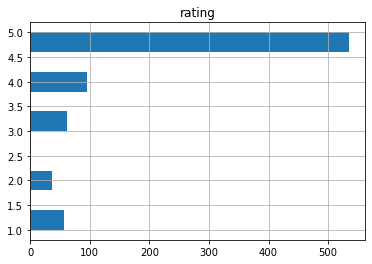

In [4]:
import matplotlib.pyplot as plt
giraffe_reviews.hist(column='rating', orientation='horizontal')
plt.show()

# Building a sentiment classifier

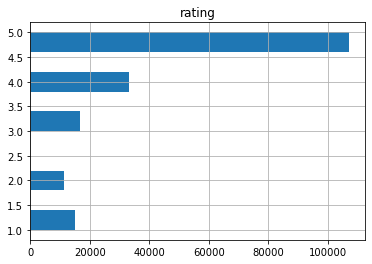

In [5]:
products.hist(column='rating', orientation='horizontal')
plt.show()

## Build word count vectors

In [6]:
import numpy as np
products=products.replace(np.nan, '', regex=True)
products

,name,review,rating
Unnamed: 0,,,
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3.0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5.0
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5.0
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5.0


In [7]:
import string

def strip_punctuation(s):
    no_p=''
    punc=string.punctuation+'123456789""'
    for c in s:
        if c not in punc:
            no_p+=c
    return no_p

df=products['review'].apply(strip_punctuation)

In [8]:
c=[]
for sentence in df:
    words=sentence.lower().split(' ')
    d={}
    for word in words:
        if word != ' ':
            if word in d:
                d[word]=d[word]+1
            else:
                d[word]=1
    nd={}
    y=sorted(d.keys())
    for k in y:
        nd[k]=d[k]
    c.append(nd)

products['word count']=c
products

,name,review,rating,word count
Unnamed: 0,,,,
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3.0,"{'': 4, 'a': 2, 'about': 1, 'also': 1, 'and': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0,"{'': 4, 'a': 2, 'about': 1, 'and': 3, 'anythin..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,"{'': 3, 'a': 2, 'all': 2, 'allow': 1, 'an': 1,..."
...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5.0,"{'a': 1, 'and': 1, 'babys': 1, 'cool': 1, 'for..."
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5.0,"{'': 2, 'a': 2, 'accessible': 1, 'accessory': ..."
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5.0,"{'and': 2, 'company': 1, 'cool': 1, 'for': 1, ..."


# Define what is positive and negative sentiment

In [9]:
#Ignore all 3 stars reviews
products=products[products['rating'] != 3]
products

,name,review,rating,word count
Unnamed: 0,,,,
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0,"{'': 4, 'a': 2, 'about': 1, 'and': 3, 'anythin..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,"{'': 3, 'a': 2, 'all': 2, 'allow': 1, 'an': 1,..."
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5.0,"{'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ..."
...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5.0,"{'a': 1, 'and': 1, 'babys': 1, 'cool': 1, 'for..."
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5.0,"{'': 2, 'a': 2, 'accessible': 1, 'accessory': ..."
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5.0,"{'and': 2, 'company': 1, 'cool': 1, 'for': 1, ..."


In [10]:
#Positive Sentiment = 4 or 5 Stars
products['sentiment']=products['rating'] >=4
products

<ipython-input-10-30986ddced66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['sentiment']=products['rating'] >=4


,name,review,rating,word count,sentiment
Unnamed: 0,,,,,
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0,"{'': 4, 'a': 2, 'about': 1, 'and': 3, 'anythin...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,"{'': 3, 'a': 2, 'all': 2, 'allow': 1, 'an': 1,...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5.0,"{'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ...",True
...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5.0,"{'a': 1, 'and': 1, 'babys': 1, 'cool': 1, 'for...",True
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5.0,"{'': 2, 'a': 2, 'accessible': 1, 'accessory': ...",True
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5.0,"{'and': 2, 'company': 1, 'cool': 1, 'for': 1, ...",True


## Train the Sentiment Classifier

## Create Training and Test Set

In [11]:
feature_names=['word count']
x=products[feature_names]
y=products['sentiment']

In [12]:
from sklearn.feature_extraction import DictVectorizer
dictVectorizer=DictVectorizer()
x=dictVectorizer.fit_transform(x['word count'])

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\GABRIEL ALVARADO\anaconda3\envs\py3env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predictions=logreg.predict(x_test)
pred_prob=logreg.predict_proba(x_test)

# Evaluate the Sentiment Model

In [16]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.93


In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh=roc_curve(y_test, pred_prob[:,1], pos_label=1)

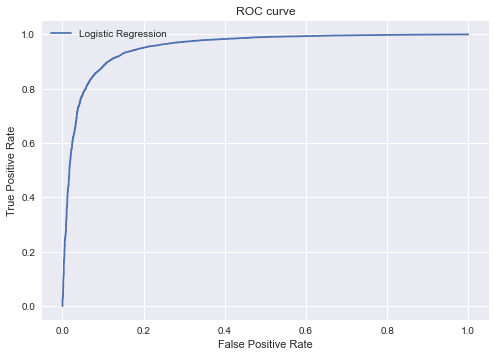

In [18]:
plt.style.use('seaborn')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.82      0.72      0.77      5362
        True       0.95      0.97      0.96     27989

    accuracy                           0.93     33351
   macro avg       0.89      0.84      0.86     33351
weighted avg       0.93      0.93      0.93     33351



In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[ 3838  1524]
 [  823 27166]]


# Apply the Model

In [21]:
giraffe_reviews=products[products['name']=='Vulli Sophie the Giraffe Teether']
giraffe_reviews

,name,review,rating,word count,sentiment
Unnamed: 0,,,,,
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5.0,"{'all': 1, 'and': 1, 'because': 1, 'been': 1, ...",True
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5.0,"{'a': 1, 'also': 1, 'and': 1, 'bag': 1, 'clean...",True
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1.0,"{'': 2, '0': 1, 'a': 3, 'all': 1, 'allergies':...",False
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5.0,"{'all': 1, 'and': 2, 'another': 1, 'babies': 1...",True
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5.0,"{'': 6, '0': 1, 'a': 1, 'about': 2, 'after': 1...",True
...,...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5.0,"{'all': 1, 'and': 1, 'baby': 1, 'can': 1, 'che...",True
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5.0,"{'a': 2, 'about': 1, 'all': 1, 'and': 1, 'as':...",True
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5.0,"{'again': 1, 'and': 1, 'baby': 2, 'be': 1, 'bo...",True


In [22]:
yn=giraffe_reviews['sentiment']
xn=dictVectorizer.fit_transform(giraffe_reviews['word count'])
logreg.fit(xn, yn)
predicted_sentiment_proba=logreg.predict_proba(xn)

In [23]:
predicted_sentiment=logreg.predict(xn)

In [24]:
giraffe_reviews['predicted_sentiment']=predicted_sentiment
giraffe_reviews['probability']=predicted_sentiment_proba[:,1]

<ipython-input-24-e4f2a5c82725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giraffe_reviews['predicted_sentiment']=predicted_sentiment
<ipython-input-24-e4f2a5c82725>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giraffe_reviews['probability']=predicted_sentiment_proba[:,1]


In [25]:
giraffe_reviews

,name,review,rating,word count,sentiment,predicted_sentiment,probability
Unnamed: 0,,,,,,,
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5.0,"{'all': 1, 'and': 1, 'because': 1, 'been': 1, ...",True,True,0.993614
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5.0,"{'a': 1, 'also': 1, 'and': 1, 'bag': 1, 'clean...",True,True,0.990657
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1.0,"{'': 2, '0': 1, 'a': 3, 'all': 1, 'allergies':...",False,False,0.049338
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5.0,"{'all': 1, 'and': 2, 'another': 1, 'babies': 1...",True,True,0.982588
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5.0,"{'': 6, '0': 1, 'a': 1, 'about': 2, 'after': 1...",True,True,0.902300
...,...,...,...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5.0,"{'all': 1, 'and': 1, 'baby': 1, 'can': 1, 'che...",True,True,0.994995
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5.0,"{'a': 2, 'about': 1, 'all': 1, 'and': 1, 'as':...",True,True,0.974648
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5.0,"{'again': 1, 'and': 1, 'baby': 2, 'be': 1, 'bo...",True,True,0.995958


## Sort the reviews based on the predicted sentiment and explore

In [26]:
giraffe_reviews=giraffe_reviews.sort_values('probability', ascending=False)
giraffe_reviews.head()

,name,review,rating,word count,sentiment,predicted_sentiment,probability
Unnamed: 0,,,,,,,
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5.0,"{'': 4, '0': 1, 'a': 5, 'able': 1, 'all': 1, '...",True,True,1.000000
34990,Vulli Sophie the Giraffe Teether,I purchased this for my grand-daughter for Chr...,5.0,"{'': 1, 'a': 4, 'also': 1, 'and': 3, 'another'...",True,True,0.999999
34571,Vulli Sophie the Giraffe Teether,We just got our adorable Sophie this week and ...,5.0,"{'': 6, 'adorable': 1, 'and': 4, 'are': 1, 'ba...",True,True,0.999999
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5.0,"{'00': 2, 'a': 3, 'about': 3, 'across': 1, 'ad...",True,True,0.999999
34992,Vulli Sophie the Giraffe Teether,This is a no brainer... this toy is like baby ...,5.0,"{'a': 3, 'adores': 1, 'an': 1, 'and': 2, 'are'...",True,True,0.999993


In [27]:
giraffe_reviews.iloc[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

## Show most negative review

In [28]:
giraffe_reviews.tail()

,name,review,rating,word count,sentiment,predicted_sentiment,probability
Unnamed: 0,,,,,,,
34466,Vulli Sophie the Giraffe Teether,After getting this for my baby and after she s...,1.0,"{'': 8, 'a': 4, 'after': 3, 'all': 1, 'amazons...",False,False,0.000257
35053,Vulli Sophie the Giraffe Teether,I received this in a box set as a gift. It cam...,2.0,"{'a': 7, 'about': 1, 'adorable': 1, 'after': 2...",False,False,0.000118
34792,Vulli Sophie the Giraffe Teether,I am very angry to find out that this teether ...,1.0,"{'': 14, 'a': 2, 'after': 2, 'ago': 1, 'all': ...",False,False,0.000098
34411,Vulli Sophie the Giraffe Teether,I was so looking forward to getting this for m...,1.0,"{'': 18, 'a': 7, 'again': 1, 'aid': 1, 'amazon...",False,False,0.000064
34824,Vulli Sophie the Giraffe Teether,I got one of these as a showe gift that my bab...,1.0,"{'': 3, 'a': 5, 'all': 2, 'already': 1, 'also'...",False,False,0.000051


In [29]:
giraffe_reviews.iloc[-1]['review']

"I got one of these as a showe gift that my baby loves. I wanted to buy another and saw it on Amazon for $19. What a deal considering these are normally $25. So I ordered and am not sure if it's the same and if the one from Amazon is authentic.I realize these are hand painted so there will be variation. But the rubber on the new one smells different and feels slightly harder than my original one. There are also some rough spots on the Amazon one whereas there were no rough spots on my original one at all as you could plainly tell it was very high quality. The sqeaker is not the same in the two versions. When you press on it to feel it, the shape of the squeaker is different shape, size, and sound. My original one squeaks better. The one from Amazon doesn't squeak well, and is higher pitched. The serial number font size on the two are different. The original one had a larger font size and the Amazon has a smaller font size. The most notable difference is the feet/hooves. The original on

# Last Analysis

## Create New Columns with Selected Words

In [55]:
selected_words=['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
def SWord_Count(Data):
    ds=Data['word count']
    for word in selected_words:
        ss=[]
        for d in ds:
            if word in d.keys():
                s=d[word]
            else:
                s=0
            ss.append(s)
        Data[word]=ss

In [65]:
SWord_Count(products)

<ipython-input-55-42f4624e53f4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[word]=ss


In [66]:
products

,name,review,rating,word count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
Unnamed: 0,,,,,,,,,,,,,,,,
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",True,0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",True,0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0,"{'': 4, 'a': 2, 'about': 1, 'and': 3, 'anythin...",True,0,0,0,0,2,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,"{'': 3, 'a': 2, 'all': 2, 'allow': 1, 'an': 1,...",True,0,1,0,0,0,0,0,0,0,0,0
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5.0,"{'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ...",True,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5.0,"{'a': 1, 'and': 1, 'babys': 1, 'cool': 1, 'for...",True,0,2,0,0,0,0,0,0,0,0,0
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5.0,"{'': 2, 'a': 2, 'accessible': 1, 'accessory': ...",True,0,1,0,0,0,0,0,0,0,0,0
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5.0,"{'and': 2, 'company': 1, 'cool': 1, 'for': 1, ...",True,0,2,0,0,0,0,0,0,0,0,0


In [67]:
products[selected_words].max()

awesome       4
great        10
fantastic     3
amazing       5
love         38
horrible      4
bad          12
terrible      6
awful         4
wow           6
hate          5
dtype: int64

'Love' is the most used word

## Create a New Model with the New Columns

In [69]:
xnm=products[selected_words]
ynm=products['sentiment']

In [70]:
xnm_train, xnm_test, ynm_train, ynm_test =train_test_split(xnm, ynm, test_size=0.2, random_state=0)

In [86]:
nlogreg=LogisticRegression()
nlogreg.fit(xnm_train, ynm_train)

LogisticRegression()

In [72]:
predictions=nlogreg.predict(xnm_test)
pred_prob=nlogreg.predict_proba(xnm_test)

In [74]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(nlogreg.score(xnm_train, ynm_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(nlogreg.score(xnm_test, ynm_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.85


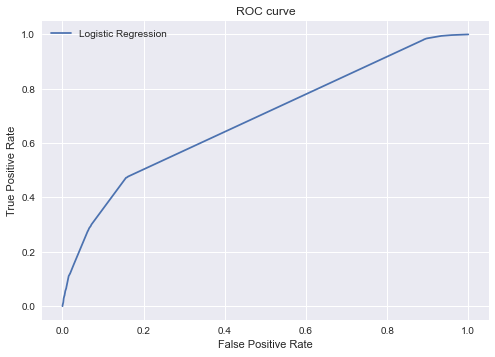

In [75]:
fpr, tpr, thresh=roc_curve(y_test, pred_prob[:,1], pos_label=1)
plt.style.use('seaborn')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [76]:
print(confusion_matrix(ynm_test, predictions))
print(classification_report(ynm_test,predictions))

[[  345  5017]
 [  147 27842]]
              precision    recall  f1-score   support

       False       0.70      0.06      0.12      5362
        True       0.85      0.99      0.92     27989

    accuracy                           0.85     33351
   macro avg       0.77      0.53      0.52     33351
weighted avg       0.82      0.85      0.79     33351



In [78]:
print(selected_words)
print(nlogreg.coef_)

['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
[[ 1.17922315  0.86559173  0.90103868  1.04515556  1.38731138 -2.28384011
  -0.98709675 -2.19590461 -2.07049828 -0.06196725 -1.43432074]]


## Apply New Model

In [79]:
diaper_reviews=products[products['name']=='Baby Trend Diaper Champ']
diaper_reviews

,name,review,rating,word count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
Unnamed: 0,,,,,,,,,,,,,,,,
312,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We'...,4.0,"{'': 17, '0': 1, 'a': 6, 'about': 1, 'accordin...",True,0,0,0,0,0,0,0,0,0,0,0
314,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1.0,"{'': 1, 'a': 5, 'about': 1, 'after': 1, 'air':...",False,0,0,0,0,0,0,0,0,0,0,0
315,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5.0,"{'': 3, 'a': 1, 'am': 1, 'bags': 1, 'conjuncti...",True,0,0,0,0,0,0,0,0,0,0,0
316,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5.0,"{'': 7, 'a': 2, 'all': 1, 'an': 1, 'and': 3, '...",True,0,0,0,0,1,0,0,0,0,0,0
317,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5.0,"{'': 17, 'a': 16, 'about': 2, 'access': 1, 'al...",True,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Baby Trend Diaper Champ,"Its a good product because its easy to use, an...",4.0,"{'': 5, 'a': 3, 'and': 2, 'bag': 1, 'bags': 1,...",True,0,0,0,0,0,0,0,0,0,0,0
641,Baby Trend Diaper Champ,this works really well. I found it easier tha...,5.0,"{'': 6, 'a': 5, 'also': 1, 'and': 3, 'annoying...",True,0,0,0,0,0,0,0,0,0,0,0
642,Baby Trend Diaper Champ,This truly is the champ of diapers. This produ...,5.0,"{'a': 4, 'about': 1, 'advise': 1, 'already': 1...",True,0,1,0,0,0,0,0,0,0,0,0


In [87]:
xn=diaper_reviews[selected_words]
yn=diaper_reviews['sentiment']

In [89]:
predicted_sentiment_proba=nlogreg.predict_proba(xn)

In [90]:
predicted_sentiment=nlogreg.predict(xn)

In [91]:
diaper_reviews['predicted_sentiment']=predicted_sentiment
diaper_reviews['probability']=predicted_sentiment_proba[:,1]
diaper_reviews

<ipython-input-91-92a46d9b24b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diaper_reviews['predicted_sentiment']=predicted_sentiment
<ipython-input-91-92a46d9b24b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diaper_reviews['probability']=predicted_sentiment_proba[:,1]


,name,review,rating,word count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,predicted_sentiment,probability
Unnamed: 0,,,,,,,,,,,,,,,,,,
312,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We'...,4.0,"{'': 17, '0': 1, 'a': 6, 'about': 1, 'accordin...",True,0,0,0,0,0,0,0,0,0,0,0,True,0.793148
314,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1.0,"{'': 1, 'a': 5, 'about': 1, 'after': 1, 'air':...",False,0,0,0,0,0,0,0,0,0,0,0,True,0.793148
315,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5.0,"{'': 3, 'a': 1, 'am': 1, 'bags': 1, 'conjuncti...",True,0,0,0,0,0,0,0,0,0,0,0,True,0.793148
316,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5.0,"{'': 7, 'a': 2, 'all': 1, 'an': 1, 'and': 3, '...",True,0,0,0,0,1,0,0,0,0,0,0,True,0.938849
317,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5.0,"{'': 17, 'a': 16, 'about': 2, 'access': 1, 'al...",True,0,0,0,1,0,1,0,0,0,0,0,True,0.526306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Baby Trend Diaper Champ,"Its a good product because its easy to use, an...",4.0,"{'': 5, 'a': 3, 'and': 2, 'bag': 1, 'bags': 1,...",True,0,0,0,0,0,0,0,0,0,0,0,True,0.793148
641,Baby Trend Diaper Champ,this works really well. I found it easier tha...,5.0,"{'': 6, 'a': 5, 'also': 1, 'and': 3, 'annoying...",True,0,0,0,0,0,0,0,0,0,0,0,True,0.793148
642,Baby Trend Diaper Champ,This truly is the champ of diapers. This produ...,5.0,"{'a': 4, 'about': 1, 'advise': 1, 'already': 1...",True,0,1,0,0,0,0,0,0,0,0,0,True,0.901108


In [92]:
diaper_reviews=diaper_reviews.sort_values('probability', ascending=False)
diaper_reviews.head()

,name,review,rating,word count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,predicted_sentiment,probability
Unnamed: 0,,,,,,,,,,,,,,,,,,
329,Baby Trend Diaper Champ,I LOVE LOVE LOVE this product! It is SO much e...,4.0,"{'': 1, 'a': 3, 'after': 1, 'again': 1, 'again...",True,0,1,0,0,3,0,0,0,0,0,0,True,0.998293
446,Baby Trend Diaper Champ,I received my Diaper Champ at my baby shower f...,5.0,"{'': 1, 'a': 2, 'after': 1, 'ago': 1, 'and': 4...",True,0,0,0,0,3,0,0,0,0,0,0,True,0.995954
459,Baby Trend Diaper Champ,"Love it, love it, love it! This lives up to t...",5.0,"{'': 5, 'all': 1, 'already': 1, 'also': 1, 'an...",True,0,0,0,0,3,0,0,0,0,0,0,True,0.995954
367,Baby Trend Diaper Champ,"Let me just say, I LOVE THIS PRODUCT!! I used...",5.0,"{'': 13, 'a': 3, 'all': 1, 'am': 1, 'and': 3, ...",True,0,1,1,0,1,0,0,0,0,0,0,True,0.988991
426,Baby Trend Diaper Champ,I love this diaper pale and wouldn't dream of ...,5.0,"{'': 2, 'and': 3, 'anything': 1, 'buy': 1, 'ca...",True,0,2,0,0,1,0,0,0,0,0,0,True,0.988598
